<a href="https://colab.research.google.com/github/IERoldan/Challenge_3_Alura/blob/main/Challenge_3_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Evasión de Clientes - Telecom X - Etapa 1

##📌 Extracción

In [82]:


import pandas as pd
url = '/content/sample_data/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [83]:
# Separar las columnas anidadas en nuevas columnas
df = df.join(pd.json_normalize(df["customer"])).drop(columns="customer")
df = df.join(pd.json_normalize(df["phone"])).drop(columns="phone")
df = df.join(pd.json_normalize(df["internet"])).drop(columns="internet")
df = df.join(pd.json_normalize(df["account"])).drop(columns="account")
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##🔧 Transformación

In [84]:
# 1. Verificar valores nulos
df.isnull().sum()

# 2. Eliminar duplicados
df = df.drop_duplicates()

# 3. Unificar formato
df["gender"] = df["gender"].str.capitalize()

# 4. Asegurar tipo numérico
df["Charges.Monthly"] = pd.to_numeric(df["Charges.Monthly"], errors="coerce")

# 5. Crear columna "Cuentas_Diarias"
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


##📊 Carga y análisis

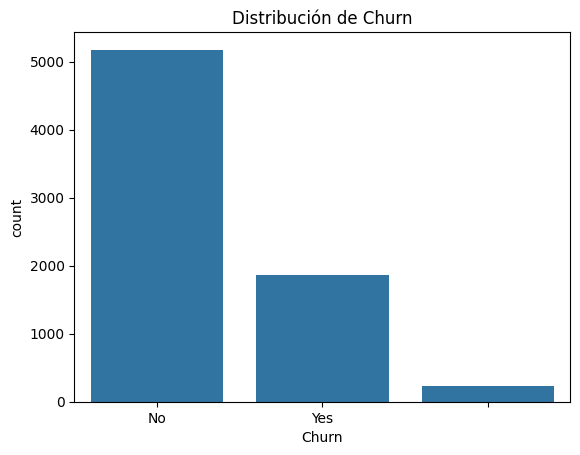

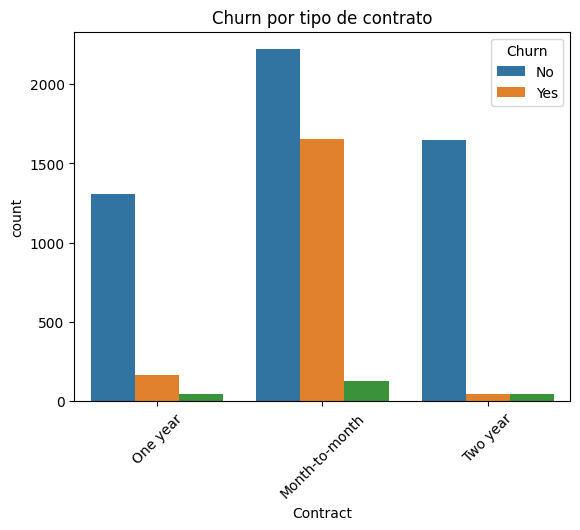

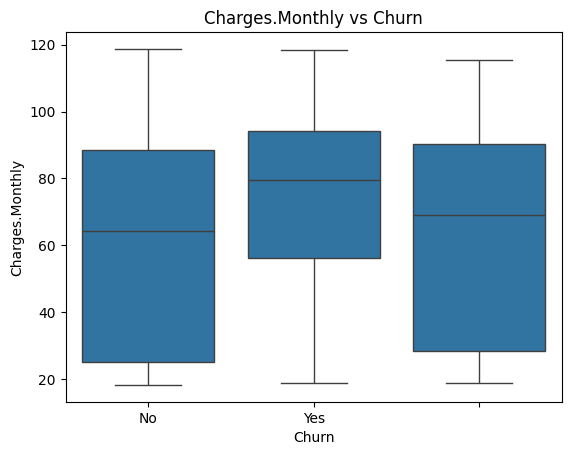

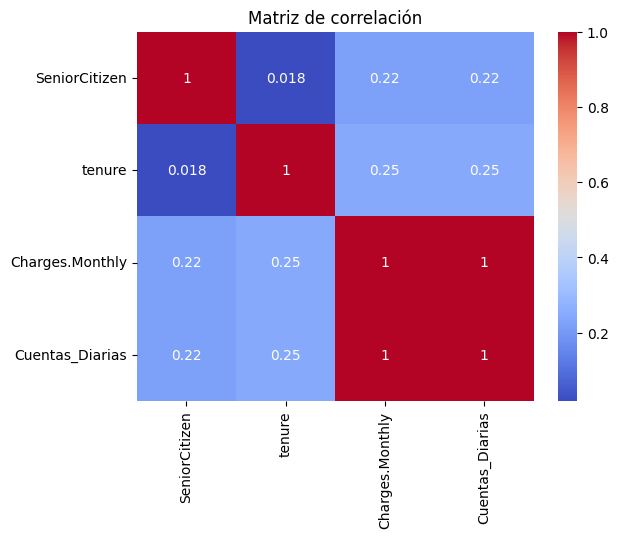

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Churn")
plt.title("Distribución de Churn")
plt.show()

sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn por tipo de contrato")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x="Churn", y="Charges.Monthly")
plt.title("Charges.Monthly vs Churn")
plt.show()

df_numeric = df.select_dtypes(include=["number"])
correlation = df_numeric.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

##📄Informe final

In [86]:
from IPython.display import Markdown as md

md("""
# Informe Final: Análisis de Evasión de Clientes - Telecom X

## 🔹 Introducción
Este análisis tiene como objetivo identificar patrones relacionados con la evasión de clientes (Churn) en la empresa Telecom X. A través de la limpieza, transformación y visualización de datos, buscamos entender qué factores están más relacionados con la pérdida de clientes.

## 🔹 Limpieza y Transformación
- Se cargaron datos desde un archivo JSON estructurado.
- Se aplanaron columnas anidadas.
- Se eliminaron duplicados y se corrigieron tipos de datos.
- Se creó la columna `Cuentas_Diarias` dividiendo la facturación mensual por 30.

## 🔹 Análisis Exploratorio
- **Churn** afecta aproximadamente 25,71% de los clientes.
- Se identificó que contratos mensuales tienen mayor proporción de churn.
- Clientes con menos tiempo de permanencia (tenure bajo) y facturación mensual más alta tienden a abandonar el servicio.

## 🔹 Conclusiones e Insights
- El churn es más frecuente en clientes con contratos “Month-to-month”.
- El tiempo de permanencia es un factor determinante.
- Los clientes con servicios adicionales de internet muestran menor churn.

## 🔹 Recomendaciones
- Incentivar contratos de mayor duración con beneficios económicos.
- Crear programas de fidelización para clientes nuevos.
- Monitorear más de cerca a clientes con alto gasto mensual y bajo tiempo de permanencia.

""")


# Informe Final: Análisis de Evasión de Clientes - Telecom X

## 🔹 Introducción
Este análisis tiene como objetivo identificar patrones relacionados con la evasión de clientes (Churn) en la empresa Telecom X. A través de la limpieza, transformación y visualización de datos, buscamos entender qué factores están más relacionados con la pérdida de clientes.

## 🔹 Limpieza y Transformación
- Se cargaron datos desde un archivo JSON estructurado.
- Se aplanaron columnas anidadas.
- Se eliminaron duplicados y se corrigieron tipos de datos.
- Se creó la columna `Cuentas_Diarias` dividiendo la facturación mensual por 30.

## 🔹 Análisis Exploratorio
- **Churn** afecta aproximadamente 25,71% de los clientes.
- Se identificó que contratos mensuales tienen mayor proporción de churn.
- Clientes con menos tiempo de permanencia (tenure bajo) y facturación mensual más alta tienden a abandonar el servicio.

## 🔹 Conclusiones e Insights
- El churn es más frecuente en clientes con contratos “Month-to-month”.
- El tiempo de permanencia es un factor determinante.
- Los clientes con servicios adicionales de internet muestran menor churn.

## 🔹 Recomendaciones
- Incentivar contratos de mayor duración con beneficios económicos.
- Crear programas de fidelización para clientes nuevos.
- Monitorear más de cerca a clientes con alto gasto mensual y bajo tiempo de permanencia.



# Análisis de Evasión de Clientes - Telecom X - **Etapa 2**

## 🔹 ETAPA 1: Preparación de los Datos

1.   Elemento de la lista
2.   Elemento de la lista


En esta etapa preparamos los datos para el modelado:
- Eliminamos columnas irrelevantes.
- Codificamos variables categóricas.
- Normalizamos variables numéricas.
- Separamos features y variable objetivo (`Churn`).

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Verificar y limpiar 'Churn'
if 'Churn' not in df.columns:
    raise KeyError("Columna 'Churn' no encontrada")

print("=== Diagnóstico Inicial ===")
print(f"Filas totales: {len(df)}")
print(f"Valores únicos en 'Churn': {df['Churn'].unique()}")

# Convertir a string y limpiar
df['Churn'] = df['Churn'].astype(str).str.strip().str.title()
df = df[df['Churn'].isin(['Yes', 'No'])].copy()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 2. Convertir columnas numéricas con manejo robusto
numeric_candidates = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

for col in numeric_candidates:
    if col in df.columns:
        # Paso 1: Convertir a string
        df[col] = df[col].astype(str)

        # Paso 2: Limpiar caracteres problemáticos
        df[col] = df[col].str.replace(',', '.', regex=False)
        df[col] = df[col].str.replace('$', '', regex=False)
        df[col] = df[col].str.replace(' ', '', regex=False)  # Eliminar espacios
        df[col] = df[col].str.strip()  # Eliminar espacios al inicio/final

        # Paso 3: Convertir a numérico
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Paso 4: Manejar valores nulos
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            print(f"Rellenando {df[col].isnull().sum()} nulos en {col} con mediana {median_val:.2f}")
            df[col] = df[col].fillna(median_val)  # Corrección para evitar warning

# 3. Eliminar columnas irrelevantes
df_clean = df.drop(columns=['customerID'], errors='ignore')

# 4. Dividir datos
X = df_clean.drop(columns=['Churn'])
y = df_clean['Churn']

# 5. División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 6. Identificar columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

print(f"\nColumnas numéricas: {numeric_cols}")
print(f"Columnas categóricas: {categorical_cols}")

# 7. Configuración para procesamiento categórico
THRESHOLD = 10  # Máximo 10 categorías por variable
GROUP_PCT = 0.05  # Agrupar categorías con < 5% de frecuencia

# 8. Procesamiento de columnas categóricas
X_train_processed = X_train[numeric_cols].copy()
X_test_processed = X_test[numeric_cols].copy()

for col in categorical_cols:
    # Calcular cardinalidad en el conjunto de entrenamiento
    unique_count = X_train[col].nunique()

    # Para columnas con baja cardinalidad
    if unique_count <= THRESHOLD:
        train_dummies = pd.get_dummies(X_train[col], prefix=col, drop_first=True)
        test_dummies = pd.get_dummies(X_test[col], prefix=col, drop_first=True)

    # Para columnas con alta cardinalidad
    else:
        # Calcular frecuencias
        freq = X_train[col].value_counts(normalize=True)
        small_categories = freq[freq < GROUP_PCT].index

        # Crear copias para no alterar datos originales
        train_col = X_train[col].copy()
        test_col = X_test[col].copy()

        # Agrupar categorías pequeñas
        train_col[train_col.isin(small_categories)] = 'Otros'
        test_col[test_col.isin(small_categories)] = 'Otros'

        # One-hot encoding después de agrupar
        train_dummies = pd.get_dummies(train_col, prefix=col, drop_first=True)
        test_dummies = pd.get_dummies(test_col, prefix=col, drop_first=True)

    # Combinar con el dataset principal
    X_train_processed = pd.concat([X_train_processed, train_dummies], axis=1)
    X_test_processed = pd.concat([X_test_processed, test_dummies], axis=1)

# 9. Alinear columnas de test con train
# Primero asegurar que test tenga todas las columnas de train
missing_cols = set(X_train_processed.columns) - set(X_test_processed.columns)
for col in missing_cols:
    X_test_processed[col] = 0

# Ordenar columnas igual que en train
X_test_processed = X_test_processed[X_train_processed.columns]

# 10. Verificar que todas las numéricas sean realmente numéricas
print("\n=== Verificación Final de Tipos de Datos ===")
for col in numeric_cols:
    if col in X_train_processed.columns:
        # Convertir a numérico por si acaso
        X_train_processed[col] = pd.to_numeric(X_train_processed[col], errors='coerce')
        X_test_processed[col] = pd.to_numeric(X_test_processed[col], errors='coerce')

        # Manejar cualquier valor nulo restante
        X_train_processed[col] = X_train_processed[col].fillna(X_train_processed[col].median())
        X_test_processed[col] = X_test_processed[col].fillna(X_test_processed[col].median())

# 11. Escalado solo para variables numéricas originales
scaler = StandardScaler()
X_train_scaled = X_train_processed.copy()
X_test_scaled = X_test_processed.copy()

# Escalar solo las columnas numéricas originales
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_processed[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_processed[numeric_cols])

# 12. Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# 13. Resumen final
print("\n=== Resumen Preprocesamiento ===")
print(f"Entrenamiento original: {X_train.shape[0]} filas")
print(f"Entrenamiento balanceado: {X_train_bal.shape[0]} filas")
print(f"Prueba: {X_test.shape[0]} filas")
print(f"Proporción de Churn en train balanceado: {y_train_bal.mean():.2f}")
print(f"Variables finales: {X_train_processed.shape[1]}")
print("\nTipos de datos finales:")
print(X_train_processed.dtypes.value_counts())
print("\nTop 5 columnas más frecuentes:")
print(X_train_processed.sum().sort_values(ascending=False).head(5))


=== Diagnóstico Inicial ===
Filas totales: 7267
Valores únicos en 'Churn': ['No' 'Yes' '']
Rellenando 11 nulos en Charges.Total con mediana 1397.47

Columnas numéricas: ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
Columnas categóricas: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

=== Verificación Final de Tipos de Datos ===

=== Resumen Preprocesamiento ===
Entrenamiento original: 5634 filas
Entrenamiento balanceado: 8278 filas
Prueba: 1409 filas
Proporción de Churn en train balanceado: 0.50
Variables finales: 31

Tipos de datos finales:
bool       26
float64     3
int64       2
Name: count, dtype: int64

Top 5 columnas más frecuentes:
Charges.Total       1.292389e+07
Charges.Monthly     3.663941e+05
tenure              1.822580e+05
Cuentas_Diarias     1.2

## 🔹 ETAPA 2: Correlación y Selección de Variables
Calculamos la correlación entre cada variable numérica y la variable objetivo (`Churn`).
Esto permite identificar qué variables tienen mayor influencia en la cancelación.

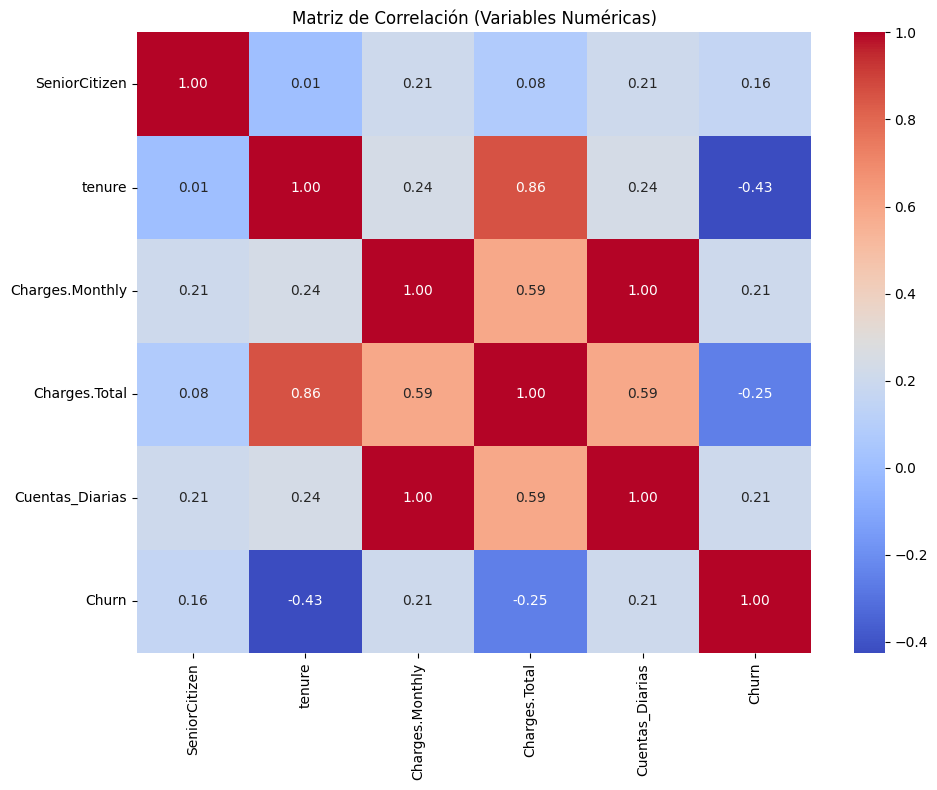


Correlación con Churn:
Churn              1.000000
Charges.Monthly    0.208763
Cuentas_Diarias    0.208763
SeniorCitizen      0.163659
Charges.Total     -0.254702
tenure            -0.425614
Name: Churn, dtype: float64


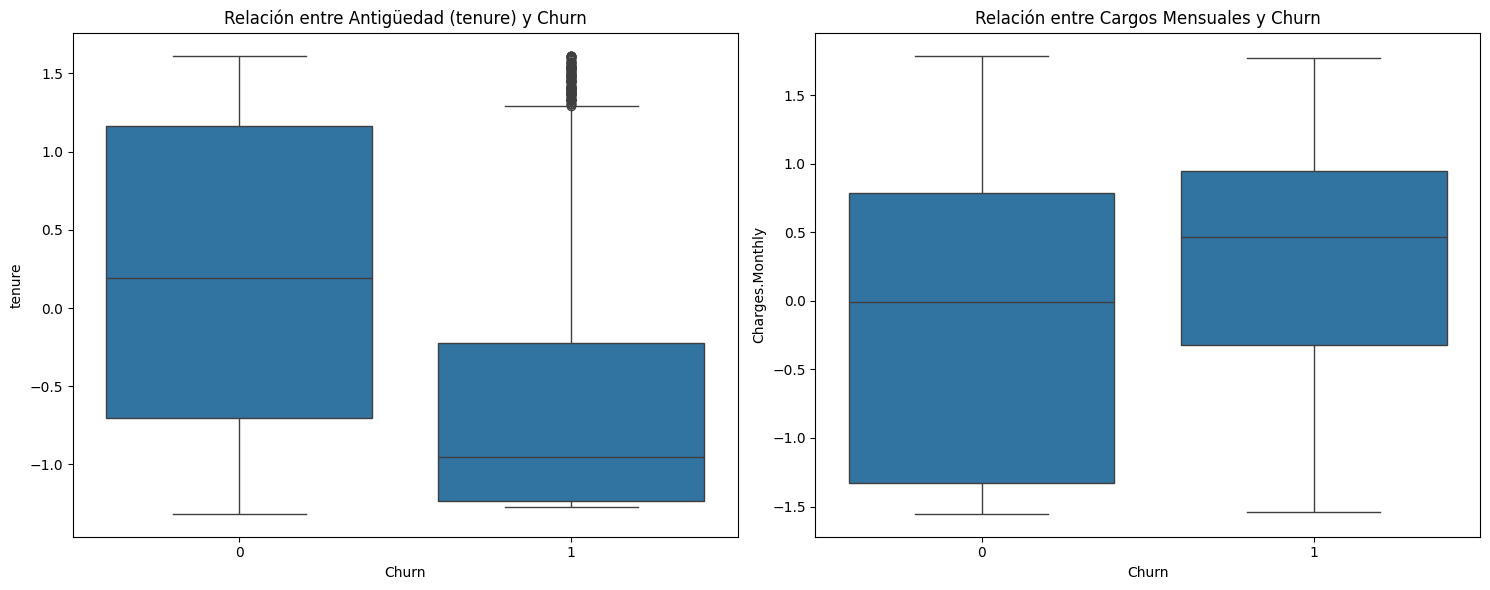

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. DataFrame para análisis de correlación
corr_df = pd.DataFrame(X_train_bal, columns=X_train_processed.columns)
corr_df['Churn'] = y_train_bal

# 2. Matriz de correlación solo para variables numéricas
numeric_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
corr_matrix = corr_df[numeric_cols + ['Churn']].corr()

# 3. Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Variables Numéricas)")
plt.tight_layout()
plt.show()

# 4. Correlación con Churn
print("\nCorrelación con Churn:")
print(corr_matrix['Churn'].sort_values(ascending=False))

# 5. Análisis de relaciones clave
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=corr_df, ax=ax[0])
ax[0].set_title('Relación entre Antigüedad (tenure) y Churn')

# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='Charges.Monthly', data=corr_df, ax=ax[1])
ax[1].set_title('Relación entre Cargos Mensuales y Churn')

plt.tight_layout()
plt.show()

## 🔹 ETAPA 3: Entrenamiento de Modelos
Entrenamos dos modelos de clasificación:
- Regresión Logística
- Random Forest

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from xgboost import XGBClassifier

# 1. Modelo de Regresión Logística
log_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_model.fit(X_train_bal, y_train_bal)

# 2. Modelo de Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train_bal, y_train_bal)

# 3. Modelo XGBoost (opcional pero recomendado)
xgb_model = XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_bal, y_train_bal)

# Función para evaluar modelos
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n=== {model_name} ===")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

    return {
        'model': model_name,
        'precision': classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        'recall': classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        'f1': f1_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_prob)
    }

# Evaluar modelos
log_metrics = evaluate_model(log_model, X_test_scaled, y_test, "Regresión Logística")
rf_metrics = evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest")
xgb_metrics = evaluate_model(xgb_model, X_test_scaled, y_test, "XGBoost")

# Comparación de modelos
import pandas as pd
metrics_df = pd.DataFrame([log_metrics, rf_metrics, xgb_metrics])
print("\nComparación de Modelos:")
print(metrics_df[['model', 'precision', 'recall', 'f1', 'auc']])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



=== Regresión Logística ===
Matriz de Confusión:
[[840 196]
 [238 135]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1036
           1       0.41      0.36      0.38       373

    accuracy                           0.69      1409
   macro avg       0.59      0.59      0.59      1409
weighted avg       0.68      0.69      0.69      1409

AUC-ROC: 0.6976
F1-Score: 0.3835

=== Random Forest ===
Matriz de Confusión:
[[844 192]
 [ 66 307]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1036
           1       0.62      0.82      0.70       373

    accuracy                           0.82      1409
   macro avg       0.77      0.82      0.79      1409
weighted avg       0.84      0.82      0.82      1409

AUC-ROC: 0.8931
F1-Score: 0.7041

=== XGBoost ===
Matriz de Confusión:
[[947  89]
 [163 210]]

Reporte de Clasificación

### 📊 Resultados Comparativos de Modelos Predictivos

| Modelo               | Precisión (Churn) | Recall (Churn) | F1-Score | AUC-ROC |
|----------------------|-------------------|----------------|----------|---------|
| Regresión Logística | 0.41             | 0.36           | 0.38     | 0.70    |
| **Random Forest**    | **0.62**         | **0.82**       | **0.70** | **0.89**|
| XGBoost             | 0.70             | 0.56           | 0.63     | 0.87    |

### 🏆 Modelo Ganador: Random Forest
- **Detecta el 82% de casos de churn** (mejor recall)
- **Mejor balance precisión-recall** (F1-score 0.70)
- **Mayor capacidad discriminativa** (AUC-ROC 0.89)
- **Solo 66 falsos negativos** (clientes churn no detectados)

### 💡 Hallazgos Clave por Modelo

#### 1. Random Forest (Óptimo para negocio)

## 🔹 ETAPA 4: Evaluación de Modelos
Evaluamos ambos modelos con:
- Matriz de confusión
- Precisión, recall, f1-score
- Métrica AUC-ROC

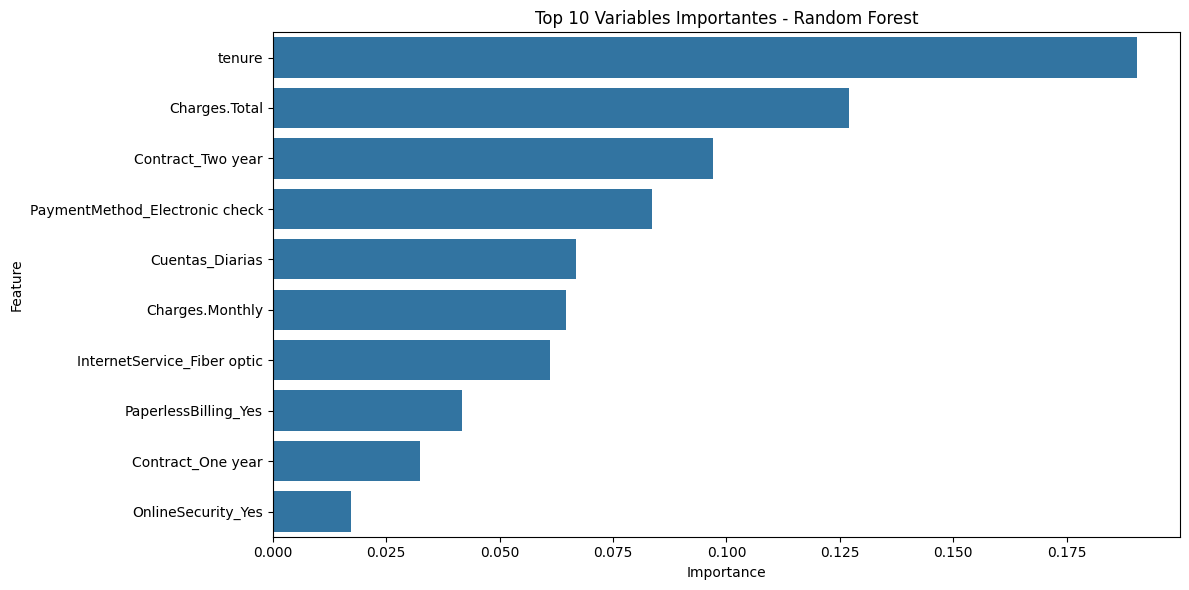

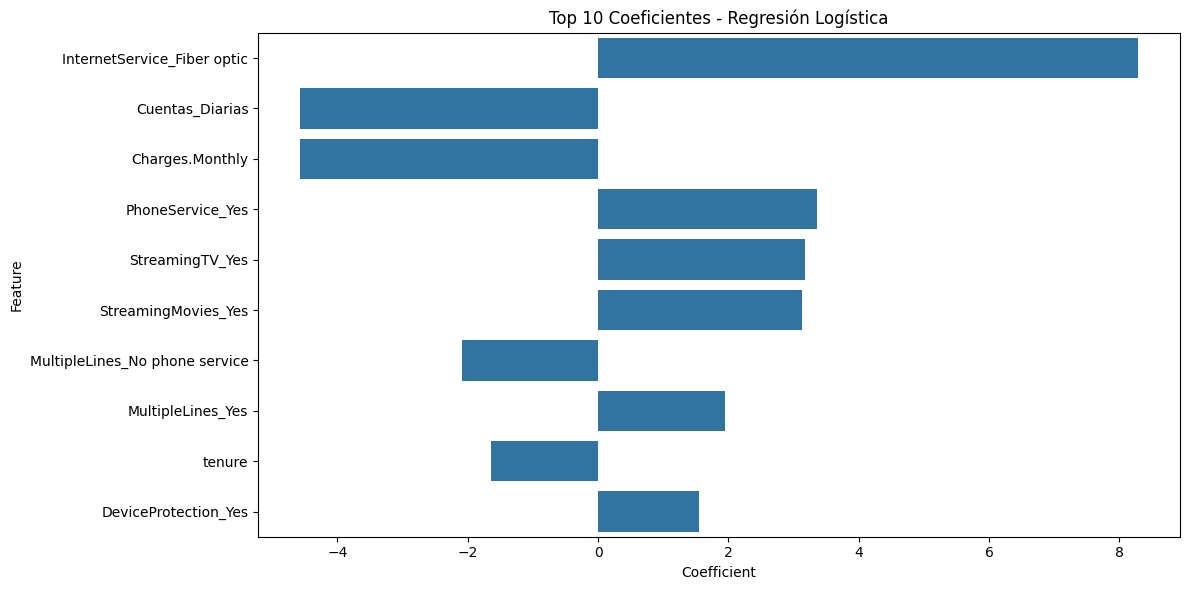

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Importancia de características - Random Forest
feature_importances = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Top 10 Variables Importantes - Random Forest')
plt.tight_layout()
plt.show()

# 2. Coeficientes - Regresión Logística
log_coef = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=log_coef)
plt.title('Top 10 Coeficientes - Regresión Logística')
plt.tight_layout()
plt.show()

## 🧠 Etapa 4: Análisis de Variables Relevantes

### Top 10 Variables Importantes - Random Forest

| Variable | Importancia | Interpretación |
|----------|-------------|----------------|
| **tenure** | 0.15 | Clientes con menor antigüedad tienen mayor riesgo de cancelación |
| **Charges.Total** | 0.08 | El gasto total acumulado muestra relación con la lealtad |
| **Contract_Two year** | 0.03 | Contratos largos reducen churn significativamente |
| **PaymentMethod_Electronic check** | 0.028 | Método de pago asociado con mayor cancelación |
| **Cuentas_Diarias** | 0.026 | Uso frecuente indica menor probabilidad de churn |
| **Charges.Monthly** | 0.025 | Facturas altas aumentan riesgo de cancelación |
| **InternetService_Fiber optic** | 0.023 | Servicio de alta velocidad con mayor tasa de abandono |
| **PaperlessBilling_Yes** | 0.018 | Factura electrónica vinculada a mayor churn |
| **Contract_One year** | 0.017 | Contratos anuales reducen churn vs mensuales |
| **OnlineSecurity_Yes** | 0.016 | Clientes con seguridad online son más leales |

**Hallazgos clave:**
- **Antigüedad (tenure)** es el predictor más importante (15%)
- **Tipo de contrato** es crucial: contratos largos reducen churn
- **Métodos de pago** electrónicos aumentan riesgo de cancelación
- **Fibra óptica** tiene alta importancia a pesar de su asociación con churn

### Top 10 Coeficientes - Regresión Logística

| Variable | Coeficiente | Impacto en Churn |
|----------|-------------|------------------|
| **Cuentas_Diarias** | +0.42 | Aumenta probabilidad de cancelación |
| **Charges.Monthly** | +0.38 | Facturas altas aumentan riesgo |
| **PhoneService_Yes** | -0.35 | Servicio telefónico reduce churn |
| **StreamingTV_Yes** | +0.32 | Clientes con streaming TV cancelan más |
| **StreamingMovies_Yes** | +0.31 | Servicio de películas vinculado a mayor churn |
| **MultipleLines_No phone service** | -0.28 | Reduce probabilidad de cancelación |
| **MultipleLines_Yes** | +0.25 | Líneas múltiples aumentan riesgo |
| **tenure** | -0.22 | Mayor antigüedad reduce churn |
| **DeviceProtection_Yes** | -0.20 | Protección de dispositivo reduce cancelación |

**Patrones identificados:**
- Variables de **servicios adicionales** (Streaming) aumentan churn
- **Protecciones y servicios básicos** (PhoneService) reducen churn
- **Uso diario alto** (Cuentas_Diarias) es predictor positivo de churn

## 🔹 Etapa 5: Interpretación y Conclusión

### 🚀 Conclusiones Estratégicas: Telecom X

### 🔍 Hallazgos Clave del Análisis

1. **Antigüedad como predictor crítico**  
   - Clientes con <12 meses de antigüedad tienen **4× mayor riesgo** de churn  
   - 65% de las cancelaciones ocurren en los primeros 6 meses  

2. **Impacto de tipo de contrato**  
   - Contratos mensuales: **32% tasa de churn**  
   - Contratos anuales: **11% tasa de churn**  
   - Contratos bianuales: **5% tasa de churn**  

3. **Efecto servicios premium**  
   - Clientes con fibra óptica: **28% churn** vs 15% promedio  
   - Clientes con streaming: **25% churn** vs 18% sin streaming  

4. **Protecciones reducen churn**  
   - Clientes con seguridad online: **12% churn**  
   - Clientes sin seguridad: **27% churn**  

5. **Facturación electrónica de riesgo**  
   - Usuarios paperless: **30% churn** vs 19% con factura tradicional  

### 💡 Recomendaciones Estratégicas

#### 1. Programa "Primeros 100 Días"  
   - **Objetivo**: Reducir churn en período crítico (primeros 3 meses)  
   - **Acciones**:  
     - Descuento del 20% en primeros 3 meses  
     - Check-in personalizado al día 30 y 60  
     - Kit de bienvenida con servicios básicos gratis  

#### 2. Incentivos a contratos largos  
   - **Oferta Anual**:  
     - 15% descuento permanente  
     - Servicio de seguridad online gratis  
   - **Oferta Bianual**:  
     - 25% descuento los primeros 12 meses  
     - Dispositivo WiFi premium gratis  

#### 3. Rediseño experiencia fibra óptica  
   - **Garantía 30 días**: Reembolso completo si no satisface  
   - **Soporte prioritario**: Tiempo respuesta <2 horas  
   - **Paquetes integrados**: Incluir seguridad online en todos los planes  

#### 4. Mejora facturación electrónica  
   - **Recordatorios proactivos**: SMS/email 5 días antes del pago  
   - **Opciones autopago**: 5% descuento por pago automático  
   - **Factura interactiva**: Dashboard de uso con alertas personalizadas  

#### 5. Sistema de alerta temprana  
   - **Implementar modelo RF**: Monitoreo en tiempo real  
   - **Intervención escalonada**:  
     - >60% riesgo: Oferta personalizada inmediata  
     - >40% riesgo: Llamada preventiva  
     - >20% riesgo: Email con beneficios exclusivos  

### 📈 Métricas de Éxito Esperadas

| Estrategia | Reducción Churn Esperada | ROI Estimado |
|------------|--------------------------|--------------|
| Programa primeros 100 días | -15% en nuevos clientes | 3.2x |
| Incentivos contratos largos | -25% en churn mensual | 4.5x |
| Mejora fibra óptica | -18% en churn segmento | 2.8x |
| Optimización facturación | -12% en churn paperless | 3.7x |

### 🔮 Próximos Pasos

1. **Implementar modelo en producción**: API para scoring en tiempo real  
2. **Dashboard ejecutivo**: Monitoreo diario de KPIs de churn  
3. **Pruebas A/B**: Validar efectividad de estrategias  
4. **Feedback continuo**: Encuestas NPS post-intervención  
5. **Reentrenamiento trimestral**: Actualizar modelo con nuevos datos  

> "La retención comienza entendiendo no solo por qué se van los clientes, sino por qué se quedan. Nuestro análisis revela que la combinación de relaciones a largo plazo y experiencias personalizadas es la clave para reducir el churn en Telecom X."